In [1]:
print("hello")

hello


In [4]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from langchain_groq import ChatGroq
from dotenv import load_dotenv
from langgraph.checkpoint.memory import InMemorySaver
import os

In [5]:
# Load environment variables
load_dotenv()

# Initialize LLM
llm = ChatGroq(
    model="llama-3.3-70b-versatile",  # or llama3-70b-8192, mixtral-8x7b-32768
    temperature=0.7,
    groq_api_key=os.getenv("GROQ_API_KEY"),
)

## define state

In [6]:
class JokeState(TypedDict):

    topic: str
    joke: str
    explanation: str

## Node functions

In [7]:
def joke_generator(state: JokeState):
    prompt = f"generate a joke about {state['topic']}"
    response = llm.invoke(prompt)
    return {"joke": response.content}

In [8]:
def joke_explainer(state: JokeState):
    prompt = f"explain the joke: {state['joke']}"
    response = llm.invoke(prompt)
    return {"explanation": response.content}

## Bulid Graph

In [11]:
graph = StateGraph(JokeState)

graph.add_node("generate_joke", joke_generator)
graph.add_node("explain_joke", joke_explainer)

graph.add_edge(START, "generate_joke")
graph.add_edge("generate_joke", "explain_joke")
graph.add_edge("explain_joke", END)

checkpointer = InMemorySaver()
workflow = graph.compile(checkpointer=checkpointer)

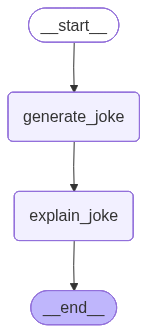

In [12]:
workflow

thread_id is used for state & memory isolation

config store metadata

In [13]:
config1 = {"configurable": {"thread_id": "1"}}
workflow.invoke({'topic':'pizza'}, config=config1)

{'topic': 'pizza',
 'joke': 'Why was the pizza in a bad mood?\n\nBecause it was feeling a little crusty.',
 'explanation': 'A classic play on words. The joke is funny because it uses a pun to create a wordplay between the literal meaning of "crusty" (referring to the crust of a pizza) and the figurative meaning of "crusty" (meaning grumpy or irritable).\n\nIn this joke, the setup "Why was the pizza in a bad mood?" primes the listener to expect a reason why the pizza is unhappy. The punchline "Because it was feeling a little crusty" subverts this expectation by using the word "crusty" in a way that is both literal (the pizza has a crust) and figurative (the pizza is feeling grumpy). The humor comes from the unexpected twist on the word\'s meaning, creating a clever and amusing connection between the setup and the punchline.'}

In [15]:
workflow.get_state(config1)

StateSnapshot(values={'topic': 'pizza', 'joke': 'Why was the pizza in a bad mood?\n\nBecause it was feeling a little crusty.', 'explanation': 'A classic play on words. The joke is funny because it uses a pun to create a wordplay between the literal meaning of "crusty" (referring to the crust of a pizza) and the figurative meaning of "crusty" (meaning grumpy or irritable).\n\nIn this joke, the setup "Why was the pizza in a bad mood?" primes the listener to expect a reason why the pizza is unhappy. The punchline "Because it was feeling a little crusty" subverts this expectation by using the word "crusty" in a way that is both literal (the pizza has a crust) and figurative (the pizza is feeling grumpy). The humor comes from the unexpected twist on the word\'s meaning, creating a clever and amusing connection between the setup and the punchline.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0d9290-e7da-6cbb-8002-74f0dc0fd1b2'}}, metadata={'

In [17]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'pizza', 'joke': 'Why was the pizza in a bad mood?\n\nBecause it was feeling a little crusty.', 'explanation': 'A classic play on words. The joke is funny because it uses a pun to create a wordplay between the literal meaning of "crusty" (referring to the crust of a pizza) and the figurative meaning of "crusty" (meaning grumpy or irritable).\n\nIn this joke, the setup "Why was the pizza in a bad mood?" primes the listener to expect a reason why the pizza is unhappy. The punchline "Because it was feeling a little crusty" subverts this expectation by using the word "crusty" in a way that is both literal (the pizza has a crust) and figurative (the pizza is feeling grumpy). The humor comes from the unexpected twist on the word\'s meaning, creating a clever and amusing connection between the setup and the punchline.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0d9290-e7da-6cbb-8002-74f0dc0fd1b2'}}, metadata={

In [19]:
#make another config
config2 = {"configurable": {"thread_id": "2"}}
workflow.invoke({'topic':'rice'}, config=config2)

{'topic': 'rice',
 'joke': 'Why did the rice go to therapy?\n\nBecause it was feeling a little "drained" and wanted to work through some "grain" of truth issues!',
 'explanation': 'A clever play on words. Here\'s a breakdown of the joke:\n\nThe joke starts by setting up a unexpected scenario: rice going to therapy. This already piques the listener\'s curiosity.\n\nThe punchline is where the wordplay happens:\n\n* "Drained" has a double meaning:\n\t+ In a literal sense, rice is often drained of excess water after cooking.\n\t+ In a psychological sense, "feeling drained" means feeling emotionally exhausted or depleted.\n* "Grain of truth" is an idiomatic expression that means a small, underlying truth or fact. However, in this joke, "grain" also refers to the fact that rice is a type of grain.\n\nSo, the joke is saying that the rice is feeling emotionally drained (like it\'s lost its emotional water) and wants to work through some deep-seated issues (the "grain of truth") with a therapis